In [ ]:
!pip install kaggle

In [ ]:
#configuring the path of Kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#dataset api

!kaggle competitions download -c cifar-10

100% 713M/715M [00:09<00:00, 87.6MB/s]
100% 715M/715M [00:09<00:00, 81.5MB/s]


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [ ]:
#extracting the dataset

from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [ ]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 37.3 MB/s eta 0:00:00


In [ ]:
import py7zr
archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing Dependencies

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image #image processing library
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


In [ ]:
filenames = os.listdir('/content/train')

In [ ]:
type(filenames)

list

In [ ]:
len(filenames)

50000

In [ ]:
print(filenames[0:5])
print(filenames[-5:])

['17983.png', '29734.png', '46788.png', '41639.png', '4579.png']
['39343.png', '21481.png', '2187.png', '34502.png', '37674.png']


**Labels Processing**

In [ ]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [ ]:
labels_df.shape

(50000, 2)

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [ ]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [ ]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [ ]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [ ]:
labels_dictionary = {'airplane' : 0, 'automobile': 1, 'bird': 2, 'cat' : 3, 'deer': 4,  'dog' : 5, 'frog' : 6, 'horse' : 7, 'ship' : 8, 'truck' : 9 }

labels = [labels_dictionary[i] for i in labels_df['label']]

In [ ]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


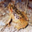

In [ ]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

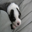

In [ ]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [ ]:
labels_df[labels_df['id'] == 45888]

,id,label
45887,45888,dog


In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
id_list = list(labels_df['id'])

In [ ]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [ ]:
#converting images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)



In [ ]:
type(data)

list

In [ ]:
len(data)

50000

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
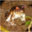

In [ ]:
data[0]

In [ ]:
#convert images list and labels into numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**Train Test Spilt**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)



In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape, X.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (40000,) (10000,) (50000, 32, 32, 3)


In [ ]:
#scaling the data

X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

In [ ]:
X_test_scaled

array([[[[0.99215686, 0.87843137, 0.71764706],
         [0.99215686, 0.88235294, 0.7254902 ],
         [0.99607843, 0.89411765, 0.73333333],
         ...,
         [1.        , 0.88627451, 0.72941176],
         [0.99607843, 0.88235294, 0.7254902 ],
         [0.99215686, 0.87843137, 0.72156863]],

        [[0.97647059, 0.8745098 , 0.71764706],
         [0.98039216, 0.87843137, 0.7254902 ],
         [0.98431373, 0.89019608, 0.74117647],
         ...,
         [0.98823529, 0.8745098 , 0.71764706],
         [0.98431373, 0.87058824, 0.71372549],
         [0.98039216, 0.86666667, 0.71372549]],

        [[0.98039216, 0.88235294, 0.72941176],
         [0.98823529, 0.89411765, 0.74509804],
         [0.99607843, 0.90588235, 0.76078431],
         ...,
         [0.99215686, 0.8745098 , 0.71372549],
         [0.98823529, 0.8745098 , 0.71764706],
         [0.98431373, 0.87058824, 0.71372549]],

        ...,

        [[0.98431373, 0.87058824, 0.71372549],
         [0.98823529, 0.8745098 , 0.71764706]

array([[[209, 210, 203],
        [213, 214, 209],
        [218, 219, 215],
        ...,
        [127,  74,  39],
        [122,  68,  35],
        [116,  63,  32]],

       [[210, 210, 202],
        [213, 214, 207],
        [218, 220, 214],
        ...,
        [124,  70,  35],
        [121,  67,  33],
        [123,  69,  36]],

       [[206, 205, 195],
        [209, 209, 202],
        [213, 215, 209],
        ...,
        [124,  70,  37],
        [131,  77,  42],
        [131,  78,  41]],

       ...,

       [[127, 108,  97],
        [138, 122, 110],
        [141, 127, 118],
        ...,
        [158, 149, 134],
        [161, 156, 151],
        [136, 137, 148]],

       [[145, 130, 119],
        [148, 135, 128],
        [136, 127, 128],
        ...,
        [175, 174, 172],
        [160, 161, 170],
        [143, 148, 164]],

       [[138, 128, 123],
        [140, 132, 136],
        [136, 131, 140],
        ...,
        [150, 154, 169],
        [145, 149, 166],
        [140, 145, 163]]], dtype=uint8)
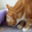

In [ ]:
X_train[0]

**Building the neural network**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(num_of_classes,activation = 'softmax')

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#compile the neural network

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
#training the newural network

model.fit(X_train_scaled, Y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2198 - loss: 2.1373 - val_accuracy: 0.3210 - val_loss: 1.8676
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3135 - loss: 1.8895 - val_accuracy: 0.3228 - val_loss: 1.8304
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3298 - loss: 1.8509 - val_accuracy: 0.3158 - val_loss: 1.8706
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3362 - loss: 1.8372 - val_accuracy: 0.3487 - val_loss: 1.8098
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3405 - loss: 1.8124 - val_accuracy: 0.3408 - val_loss: 1.8120
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3397 - loss: 1.8120 - val_accuracy: 0.3370 - val_loss: 1.8124
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3469 - loss: 1.7997 - val_accuracy: 0.3523 - val_loss: 1.7822
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3479 - loss: 1.7959 - 

**Resnet50**

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers


In [ ]:
#We are using convolutional layer of ResNet50 which is not having output layer

convolutional_base = ResNet50(weights = 'imagenet', include_top = False, input_shape = (256,256,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation = 'softmax'))

In [ ]:
model.compile(optimizer = optimizers.RMSprop(learning_rate = 2e-5), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 468s 354ms/step - acc: 0.3315 - loss: 2.0485 - val_acc: 0.7595 - val_loss: 0.8887
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 393s 349ms/step - acc: 0.6766 - loss: 1.0731 - val_acc: 0.8910 - val_loss: 0.4850
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 441s 348ms/step - acc: 0.8028 - loss: 0.7624 - val_acc: 0.9158 - val_loss: 0.3592
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 348ms/step - acc: 0.8662 - loss: 0.5831 - val_acc: 0.9320 - val_loss: 0.3105
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 391s 348ms/step - acc: 0.9079 - loss: 0.4486 - val_acc: 0.9295 - val_loss: 0.2704
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 392s 348ms/step - acc: 0.9335 - loss: 0.3548 - val_acc: 0.9398 - val_loss: 0.2360
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 349ms/step - acc: 0.9520 - loss: 0.2862 - val_acc: 0.9392 - val_loss: 0.2275
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 391s 348ms/step - acc: 0.9644 - loss: 0.2334 - val_acc: 0.9408 - val_loss: 0.2227
Epoch 9/

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)
print(loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 111ms/step - acc: 0.9303 - loss: 0.2570
Test Accuracy = 0.9320999979972839
0.24774235486984253


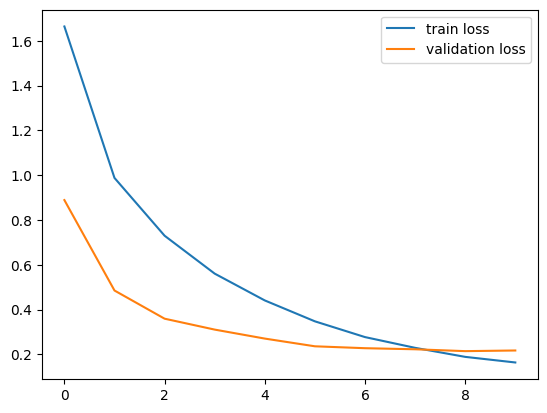

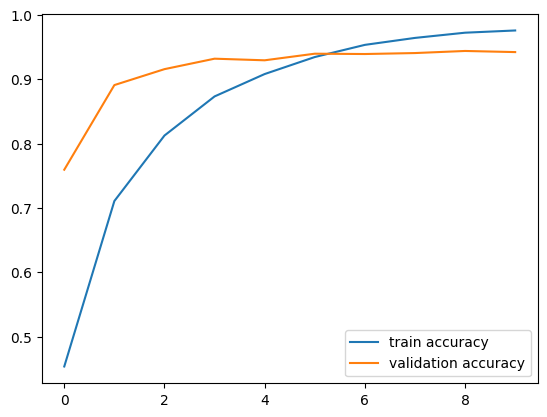

In [ ]:
h = history

#plot the loss value

plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

#plot the accuracy value

plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()